In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
sheet1 = pd.read_excel('locust_data_2018.xlsx')
sheet2 = pd.read_excel('locust_data_2019.xlsx')
sheet3 = pd.read_excel('locust_data_2020.xlsx')


In [4]:
df = pd.concat([sheet1, sheet2, sheet3], ignore_index=True)


In [5]:
df.head()


,OBJECTID,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Precipitation (mm),Soil Moisture (m^3/m^3),NDVI
0,22277,18.112778,38.310833,292.287170,0.010483,3.106655,0.000006,0.115808,0.076148
1,22278,17.846667,38.399722,289.855804,0.011615,3.312868,0.000000,0.147779,NaN
2,22279,17.819722,38.383889,293.245087,0.009486,2.611777,0.000000,0.159464,0.114986
3,22280,18.208333,38.162500,300.421417,0.004901,0.897066,0.000000,0.099460,0.208106
4,22281,18.208333,38.162500,300.421417,0.004901,0.897066,0.000000,0.099460,0.208106


In [6]:
columns_to_delete = [
     'Precipitation (mm)']

df = df.drop(columns=columns_to_delete)


In [7]:
df.head()


,OBJECTID,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
0,22277,18.112778,38.310833,292.287170,0.010483,3.106655,0.115808,0.076148
1,22278,17.846667,38.399722,289.855804,0.011615,3.312868,0.147779,NaN
2,22279,17.819722,38.383889,293.245087,0.009486,2.611777,0.159464,0.114986
3,22280,18.208333,38.162500,300.421417,0.004901,0.897066,0.099460,0.208106
4,22281,18.208333,38.162500,300.421417,0.004901,0.897066,0.099460,0.208106


In [8]:
df.describe()


,OBJECTID,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
count,10564.000000,10564.000000,10564.000000,10564.000000,10564.000000,10564.000000,6250.000000,9772.000000
mean,32206.896725,14.466797,50.842013,291.368632,0.007168,6.406212,0.144638,0.220906
std,8152.249899,10.564190,15.018523,6.861920,0.003672,3.595506,0.073572,0.155135
min,22277.000000,-4.254444,6.022500,263.044342,0.000299,0.069528,0.020000,-1.000000
25%,24938.750000,4.766667,37.716667,289.115616,0.004069,3.699462,0.084560,0.113214
50%,29161.500000,10.724722,43.752083,291.695511,0.005791,5.987664,0.123242,0.185345
75%,39481.250000,26.427986,70.919444,294.421234,0.011175,8.286240,0.182478,0.297100
max,48211.000000,34.700000,83.281389,308.779327,0.016105,24.668236,0.379791,1.000000


In [9]:
df = df.drop(columns='OBJECTID')


In [10]:
df.dropna(subset=['NDVI'], inplace=True)


In [11]:
df.dropna(subset=['Soil Moisture (m^3/m^3)'], inplace=True)

In [12]:
df.describe()


,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000
mean,8.014825,41.046053,292.001167,0.005061,5.999633,0.144128,0.238687
std,6.246411,5.372053,8.170564,0.002183,3.073645,0.073390,0.163519
min,-3.329444,6.022500,264.131927,0.000660,0.078579,0.020000,-0.059039
25%,2.882917,37.100000,285.707214,0.003630,3.573925,0.084601,0.122453
50%,7.372500,40.055833,293.383423,0.004703,5.926208,0.122749,0.202493
75%,10.633542,44.018889,297.872009,0.005913,8.168926,0.181639,0.324231
max,32.600000,81.538611,308.779327,0.016105,22.793983,0.377178,1.000000


In [13]:
result1 = df[df['Soil Moisture (m^3/m^3)'].isna()]
df.shape

(5614, 7)

In [14]:
original=df.copy()

In [15]:
# clean_df = df
df.describe()
df.head()
# combined=clean_df
columns_to_delete = [
     'Latitude (degrees)','Longitude (degrees)']

df = df.drop(columns=columns_to_delete)


In [16]:
import pandas as pd
import numpy as np
noisy_df = pd.DataFrame()
mean_param = np.mean(df['Temperature (K)'])
std_dev_param = np.std(df['Temperature (K)'], ddof=1)
random_values = np.random.uniform(low=-1000, high=1000, size=len(df))
scaled_values = random_values / 100
noisy_temp = df['Temperature (K)'] + scaled_values
noisy_df['Temperature (K)' + '_noisy'] = noisy_temp




import pandas as pd
import numpy as np
random_values = np.random.uniform(low=-1000, high=1000, size=len(df))
scaled_values = random_values / 250000
noisy_temp = df['Specific Humidity'] + scaled_values
noisy_temp = np.maximum(noisy_temp, 0)
noisy_df['Specific Humidity_noisy'] = noisy_temp





import pandas as pd
import numpy as np
# noisy_df = pd.DataFrame()
mean_param = np.mean(df['Wind Speed (m/s)'])
std_dev_param = np.std(df['Wind Speed (m/s)'], ddof=1)
random_values = np.random.uniform(low=-1000, high=1000, size=len(df))
scaled_values = random_values / 125
noisy_temp = df['Wind Speed (m/s)'] + scaled_values
noisy_temp = np.maximum(noisy_temp,0)
noisy_df['Wind Speed (m/s)' + '_noisy'] = noisy_temp





import pandas as pd
import numpy as np
# noisy_df = pd.DataFrame()
mean_param = np.mean(df['Soil Moisture (m^3/m^3)'])
std_dev_param = np.std(df['Soil Moisture (m^3/m^3)'], ddof=1)
random_values = np.random.uniform(low=-1000, high=1000, size=len(df))
scaled_values = random_values / 12500
noisy_temp = df['Soil Moisture (m^3/m^3)'] + scaled_values
noisy_temp = np.maximum(noisy_temp,0)
noisy_df['Soil Moisture (m^3/m^3)' + '_noisy'] = noisy_temp





import pandas as pd
import numpy as np
# noisy_df = pd.DataFrame()
mean_param = np.mean(df['NDVI'])
std_dev_param = np.std(df['NDVI'], ddof=1)
random_values = np.random.uniform(low=-1000, high=1000, size=len(df))
scaled_values = random_values / 1000
noisy_temp = df['NDVI'] + scaled_values
noisy_temp=np.minimum(noisy_temp,1)
noisy_df['NDVI' + '_noisy'] = noisy_temp




In [17]:
noisy_df.describe()

,Temperature (K)_noisy,Specific Humidity_noisy,Wind Speed (m/s)_noisy,Soil Moisture (m^3/m^3)_noisy,NDVI_noisy
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000
mean,292.098194,0.005077,6.385497,0.144300,0.220154
std,9.947650,0.003106,4.979470,0.085852,0.572976
min,258.965175,0.000000,0.000000,0.000000,-0.970694
25%,285.308634,0.002770,1.937358,0.081594,-0.268077
50%,292.504171,0.004925,5.984371,0.133541,0.237235
75%,299.321175,0.007006,10.043241,0.195871,0.765275
max,316.466999,0.019733,23.525454,0.446857,1.000000


In [18]:
df.describe()

,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000
mean,292.001167,0.005061,5.999633,0.144128,0.238687
std,8.170564,0.002183,3.073645,0.073390,0.163519
min,264.131927,0.000660,0.078579,0.020000,-0.059039
25%,285.707214,0.003630,3.573925,0.084601,0.122453
50%,293.383423,0.004703,5.926208,0.122749,0.202493
75%,297.872009,0.005913,8.168926,0.181639,0.324231
max,308.779327,0.016105,22.793983,0.377178,1.000000


In [19]:
df.head()


,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
0,292.287170,0.010483,3.106655,0.115808,0.076148
2,293.245087,0.009486,2.611777,0.159464,0.114986
3,300.421417,0.004901,0.897066,0.099460,0.208106
4,300.421417,0.004901,0.897066,0.099460,0.208106
5,299.409058,0.006244,0.541996,0.142801,0.125081


In [20]:
noisy_df.rename(
    columns={"Temperature (K)_noisy": "Temperature (K)"}, inplace=True)
noisy_df.rename(
    columns={"Specific Humidity_noisy": "Specific Humidity"}, inplace=True)
noisy_df.rename(
    columns={"Wind Speed (m/s)_noisy": "Wind Speed (m/s)"}, inplace=True)
noisy_df.rename(columns={"NDVI_noisy": "NDVI"}, inplace=True)
# noisy_df.rename(columns={"NDVI_noisy": "NDVI"}, inplace=True)


In [21]:
noisy_df.rename(columns={"Soil Moisture (m^3/m^3)_noisy": "Soil Moisture (m^3/m^3)"}, inplace=True)

In [22]:
noisy_df.head()


,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
0,293.737470,0.008637,5.519595,0.159039,0.678128
2,297.389391,0.006173,6.402207,0.114222,0.467257
3,306.269461,0.003023,2.505255,0.073558,-0.131043
4,309.489683,0.002827,6.943071,0.159426,0.478327
5,290.622137,0.006436,0.000000,0.111537,0.192134


In [23]:
df.head()


,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
0,292.287170,0.010483,3.106655,0.115808,0.076148
2,293.245087,0.009486,2.611777,0.159464,0.114986
3,300.421417,0.004901,0.897066,0.099460,0.208106
4,300.421417,0.004901,0.897066,0.099460,0.208106
5,299.409058,0.006244,0.541996,0.142801,0.125081


In [24]:
# Add the "result" column with values
df["result"] = 1
noisy_df["result"] = 0

# Combine the dataframes and shuffle
combined_df = pd.concat([df, noisy_df], ignore_index=True)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

combined_df.head()


,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
0,293.219299,0.005678,7.760662,0.179035,0.273643,1
1,290.343109,0.009052,1.496393,0.135193,0.037200,1
2,284.831604,0.005157,8.475640,0.169854,0.063179,1
3,305.367767,0.004618,4.804805,0.092659,0.196203,1
4,306.521562,0.000000,11.604467,0.141253,1.000000,0


In [25]:
combined_df.describe()

,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
count,11228.000000,11228.000000,11228.000000,11228.000000,11228.000000,11228.000000
mean,292.049680,0.005069,6.192565,0.144214,0.229420,0.500000
std,9.102302,0.002684,4.142090,0.079861,0.421414,0.500022
min,258.965175,0.000000,0.000000,0.000000,-0.970694,0.000000
25%,285.502167,0.003349,3.036904,0.083395,0.048467,0.000000
50%,293.120880,0.004792,5.938508,0.128462,0.209577,0.500000
75%,298.633309,0.006421,8.714572,0.188399,0.455411,1.000000
max,316.466999,0.019733,23.525454,0.446857,1.000000,1.000000


In [26]:
df.describe()

,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.0
mean,292.001167,0.005061,5.999633,0.144128,0.238687,1.0
std,8.170564,0.002183,3.073645,0.073390,0.163519,0.0
min,264.131927,0.000660,0.078579,0.020000,-0.059039,1.0
25%,285.707214,0.003630,3.573925,0.084601,0.122453,1.0
50%,293.383423,0.004703,5.926208,0.122749,0.202493,1.0
75%,297.872009,0.005913,8.168926,0.181639,0.324231,1.0
max,308.779327,0.016105,22.793983,0.377178,1.000000,1.0


In [27]:



features_to_use = [
    'Temperature (K)', 'Specific Humidity', 'Wind Speed (m/s)', 'NDVI']
X = combined_df[features_to_use]
y = combined_df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_cv, y_train, y_cv = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'auto'],
}

svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_clf = grid_search.best_estimator_
y_cv_pred = best_clf.predict(X_cv_scaled)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)
y_test_pred = best_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Cross-Validation Accuracy: {cv_accuracy:.4f}")
print(f"Test Accuracy on test data: {test_accuracy:.4f}")

combined_df.head()


Best Parameters: {'C': 10, 'gamma': 1}
Best Cross-Validation Score: 0.9047
Cross-Validation Accuracy: 0.9038
Test Accuracy on test data: 0.9061


,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
0,293.219299,0.005678,7.760662,0.179035,0.273643,1
1,290.343109,0.009052,1.496393,0.135193,0.037200,1
2,284.831604,0.005157,8.475640,0.169854,0.063179,1
3,305.367767,0.004618,4.804805,0.092659,0.196203,1
4,306.521562,0.000000,11.604467,0.141253,1.000000,0


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
features_to_use = [
    'Temperature (K)', 'Specific Humidity', 'Wind Speed (m/s)', 'NDVI']
X = combined_df[features_to_use]
y = combined_df['result']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
y_pred_neural = mlp_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_neural)
print(f"Test Accuracy using Neural Networks: {accuracy:.4f}")


Test Accuracy using Neural Networks: 0.9123


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy when Random Forest applied: {accuracy:.4f}")


Test Accuracy when Random Forest applied: 0.9074


In [30]:
df.head()

,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
0,292.287170,0.010483,3.106655,0.115808,0.076148,1
2,293.245087,0.009486,2.611777,0.159464,0.114986,1
3,300.421417,0.004901,0.897066,0.099460,0.208106,1
4,300.421417,0.004901,0.897066,0.099460,0.208106,1
5,299.409058,0.006244,0.541996,0.142801,0.125081,1


In [31]:
combined_df.shape

(11228, 6)

In [32]:
original.describe()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000
mean,8.014825,41.046053,292.001167,0.005061,5.999633,0.144128,0.238687
std,6.246411,5.372053,8.170564,0.002183,3.073645,0.073390,0.163519
min,-3.329444,6.022500,264.131927,0.000660,0.078579,0.020000,-0.059039
25%,2.882917,37.100000,285.707214,0.003630,3.573925,0.084601,0.122453
50%,7.372500,40.055833,293.383423,0.004703,5.926208,0.122749,0.202493
75%,10.633542,44.018889,297.872009,0.005913,8.168926,0.181639,0.324231
max,32.600000,81.538611,308.779327,0.016105,22.793983,0.377178,1.000000


In [33]:

mean_param = np.mean(original['Latitude (degrees)'])
std_dev_param = np.std(original['Latitude (degrees)'], ddof=1)
random_values = np.random.uniform(low=-1000, high=1000, size=len(original))
scaled_values = random_values / 2229.654
noisy_data = original['Latitude (degrees)'] + scaled_values
noisy_df['Noisy_Latitude']=noisy_data
noisy_df.describe()


mean_param = np.mean(original['Longitude (degrees)'])
std_dev_param = np.std(original['Longitude (degrees)'], ddof=1)
random_values = np.random.uniform(low=-1000, high=1000, size=len(original))
scaled_values = random_values / 2229.654
noisy_data = original['Longitude (degrees)'] + scaled_values
noisy_df['Noisy_Longitude']=noisy_data
noisy_df.describe()

noisy_df.rename(columns={"Noisy_Latitude": "Latitude (degrees)"}, inplace=True)
noisy_df.rename(columns={"Noisy_Longitude": "Longitude (degrees)"}, inplace=True)

In [34]:
noisy_df.describe()

,Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result,Latitude (degrees),Longitude (degrees)
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.0,5614.000000,5614.000000
mean,292.098194,0.005077,6.385497,0.144300,0.220154,0.0,8.012978,41.043831
std,9.947650,0.003106,4.979470,0.085852,0.572976,0.0,6.254691,5.376492
min,258.965175,0.000000,0.000000,0.000000,-0.970694,0.0,-3.505389,5.904739
25%,285.308634,0.002770,1.937358,0.081594,-0.268077,0.0,2.879647,37.127252
50%,292.504171,0.004925,5.984371,0.133541,0.237235,0.0,7.475190,40.117133
75%,299.321175,0.007006,10.043241,0.195871,0.765275,0.0,10.618182,43.980899
max,316.466999,0.019733,23.525454,0.446857,1.000000,0.0,32.505358,81.094688


In [35]:

column_order = [
    'Latitude (degrees)', 'Longitude (degrees)',
    'Temperature (K)', 'Specific Humidity', 'Wind Speed (m/s)',
    'Soil Moisture (m^3/m^3)', 'NDVI', 'result'
]
noisy_df = noisy_df[column_order]
noisy_df.head()


,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
0,17.844922,38.132821,293.737470,0.008637,5.519595,0.159039,0.678128,0
2,17.998530,38.797353,297.389391,0.006173,6.402207,0.114222,0.467257,0
3,18.217805,37.953062,306.269461,0.003023,2.505255,0.073558,-0.131043,0
4,18.065685,38.402891,309.489683,0.002827,6.943071,0.159426,0.478327,0
5,23.828978,38.992688,290.622137,0.006436,0.000000,0.111537,0.192134,0


In [36]:
noisy_df.describe()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.0
mean,8.012978,41.043831,292.098194,0.005077,6.385497,0.144300,0.220154,0.0
std,6.254691,5.376492,9.947650,0.003106,4.979470,0.085852,0.572976,0.0
min,-3.505389,5.904739,258.965175,0.000000,0.000000,0.000000,-0.970694,0.0
25%,2.879647,37.127252,285.308634,0.002770,1.937358,0.081594,-0.268077,0.0
50%,7.475190,40.117133,292.504171,0.004925,5.984371,0.133541,0.237235,0.0
75%,10.618182,43.980899,299.321175,0.007006,10.043241,0.195871,0.765275,0.0
max,32.505358,81.094688,316.466999,0.019733,23.525454,0.446857,1.000000,0.0


In [37]:
original["result"]=1

In [38]:
original.describe()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.0
mean,8.014825,41.046053,292.001167,0.005061,5.999633,0.144128,0.238687,1.0
std,6.246411,5.372053,8.170564,0.002183,3.073645,0.073390,0.163519,0.0
min,-3.329444,6.022500,264.131927,0.000660,0.078579,0.020000,-0.059039,1.0
25%,2.882917,37.100000,285.707214,0.003630,3.573925,0.084601,0.122453,1.0
50%,7.372500,40.055833,293.383423,0.004703,5.926208,0.122749,0.202493,1.0
75%,10.633542,44.018889,297.872009,0.005913,8.168926,0.181639,0.324231,1.0
max,32.600000,81.538611,308.779327,0.016105,22.793983,0.377178,1.000000,1.0


In [39]:
noisy_df.describe()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.0
mean,8.012978,41.043831,292.098194,0.005077,6.385497,0.144300,0.220154,0.0
std,6.254691,5.376492,9.947650,0.003106,4.979470,0.085852,0.572976,0.0
min,-3.505389,5.904739,258.965175,0.000000,0.000000,0.000000,-0.970694,0.0
25%,2.879647,37.127252,285.308634,0.002770,1.937358,0.081594,-0.268077,0.0
50%,7.475190,40.117133,292.504171,0.004925,5.984371,0.133541,0.237235,0.0
75%,10.618182,43.980899,299.321175,0.007006,10.043241,0.195871,0.765275,0.0
max,32.505358,81.094688,316.466999,0.019733,23.525454,0.446857,1.000000,0.0


In [40]:
final_df = pd.concat([original, noisy_df], ignore_index=True)
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [41]:
final_df.head(10)

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
0,12.200594,39.669636,292.245433,0.008768,0.000000,0.070302,-0.192378,0
1,3.010317,35.345863,283.521876,0.002749,2.448574,0.212111,1.000000,0
2,10.506389,44.063056,283.711060,0.004320,8.428660,0.082414,0.034318,1
3,9.491111,41.903889,300.290283,0.003891,6.736856,0.057227,0.473233,1
4,18.394802,37.461335,290.105706,0.007225,0.901256,0.146384,0.356778,0
5,9.955834,42.431881,296.663454,0.005052,6.172811,0.152421,-0.450810,0
6,6.408056,42.434722,279.095276,0.003273,5.836036,0.120080,0.155889,1
7,11.574741,48.781820,287.912459,0.005682,9.504812,0.002381,0.798167,0
8,6.290513,41.900924,304.861238,0.000898,3.895892,0.000000,0.608799,0
9,25.103889,37.417500,299.600433,0.006497,1.395112,0.149782,0.064915,1


In [42]:
final_df.describe()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
count,11228.000000,11228.000000,11228.000000,11228.000000,11228.000000,11228.000000,11228.000000,11228.000000
mean,8.013902,41.044942,292.049680,0.005069,6.192565,0.144214,0.229420,0.500000
std,6.250274,5.374034,9.102302,0.002684,4.142090,0.079861,0.421414,0.500022
min,-3.505389,5.904739,258.965175,0.000000,0.000000,0.000000,-0.970694,0.000000
25%,2.880431,37.120010,285.502167,0.003349,3.036904,0.083395,0.048467,0.000000
50%,7.421805,40.092123,293.120880,0.004792,5.938508,0.128462,0.209577,0.500000
75%,10.626611,43.995839,298.633309,0.006421,8.714572,0.188399,0.455411,1.000000
max,32.600000,81.538611,316.466999,0.019733,23.525454,0.446857,1.000000,1.000000


In [43]:
original.describe()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
count,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.000000,5614.0
mean,8.014825,41.046053,292.001167,0.005061,5.999633,0.144128,0.238687,1.0
std,6.246411,5.372053,8.170564,0.002183,3.073645,0.073390,0.163519,0.0
min,-3.329444,6.022500,264.131927,0.000660,0.078579,0.020000,-0.059039,1.0
25%,2.882917,37.100000,285.707214,0.003630,3.573925,0.084601,0.122453,1.0
50%,7.372500,40.055833,293.383423,0.004703,5.926208,0.122749,0.202493,1.0
75%,10.633542,44.018889,297.872009,0.005913,8.168926,0.181639,0.324231,1.0
max,32.600000,81.538611,308.779327,0.016105,22.793983,0.377178,1.000000,1.0


In [44]:
neural_final = final_df.copy()
final_df.head()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
0,12.200594,39.669636,292.245433,0.008768,0.000000,0.070302,-0.192378,0
1,3.010317,35.345863,283.521876,0.002749,2.448574,0.212111,1.000000,0
2,10.506389,44.063056,283.711060,0.004320,8.428660,0.082414,0.034318,1
3,9.491111,41.903889,300.290283,0.003891,6.736856,0.057227,0.473233,1
4,18.394802,37.461335,290.105706,0.007225,0.901256,0.146384,0.356778,0


In [45]:
features_to_use = [
    'Temperature (K)', 'Specific Humidity', 'Wind Speed (m/s)', 'NDVI']
X = final_df[features_to_use]
y = final_df['result']

X_scaled = scaler.transform(X)
y_pred_SVM = best_clf.predict(X_scaled)

test_accuracy2 = accuracy_score(y, y_pred_SVM)
test_accuracy2

0.9201995012468828

In [46]:
final_df['Predicted Result'] = y_pred_SVM
final_df.rename(columns={"result": "Actual result"}, inplace=True)

In [47]:
accuracy = accuracy_score(final_df['Actual result'], final_df['Predicted Result'])
accuracy

0.9201995012468828

In [48]:
final_df.head()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,Actual result,Predicted Result
0,12.200594,39.669636,292.245433,0.008768,0.000000,0.070302,-0.192378,0,0
1,3.010317,35.345863,283.521876,0.002749,2.448574,0.212111,1.000000,0,0
2,10.506389,44.063056,283.711060,0.004320,8.428660,0.082414,0.034318,1,1
3,9.491111,41.903889,300.290283,0.003891,6.736856,0.057227,0.473233,1,1
4,18.394802,37.461335,290.105706,0.007225,0.901256,0.146384,0.356778,0,0


In [49]:
final_df.to_csv('output_svm.csv', index=False)

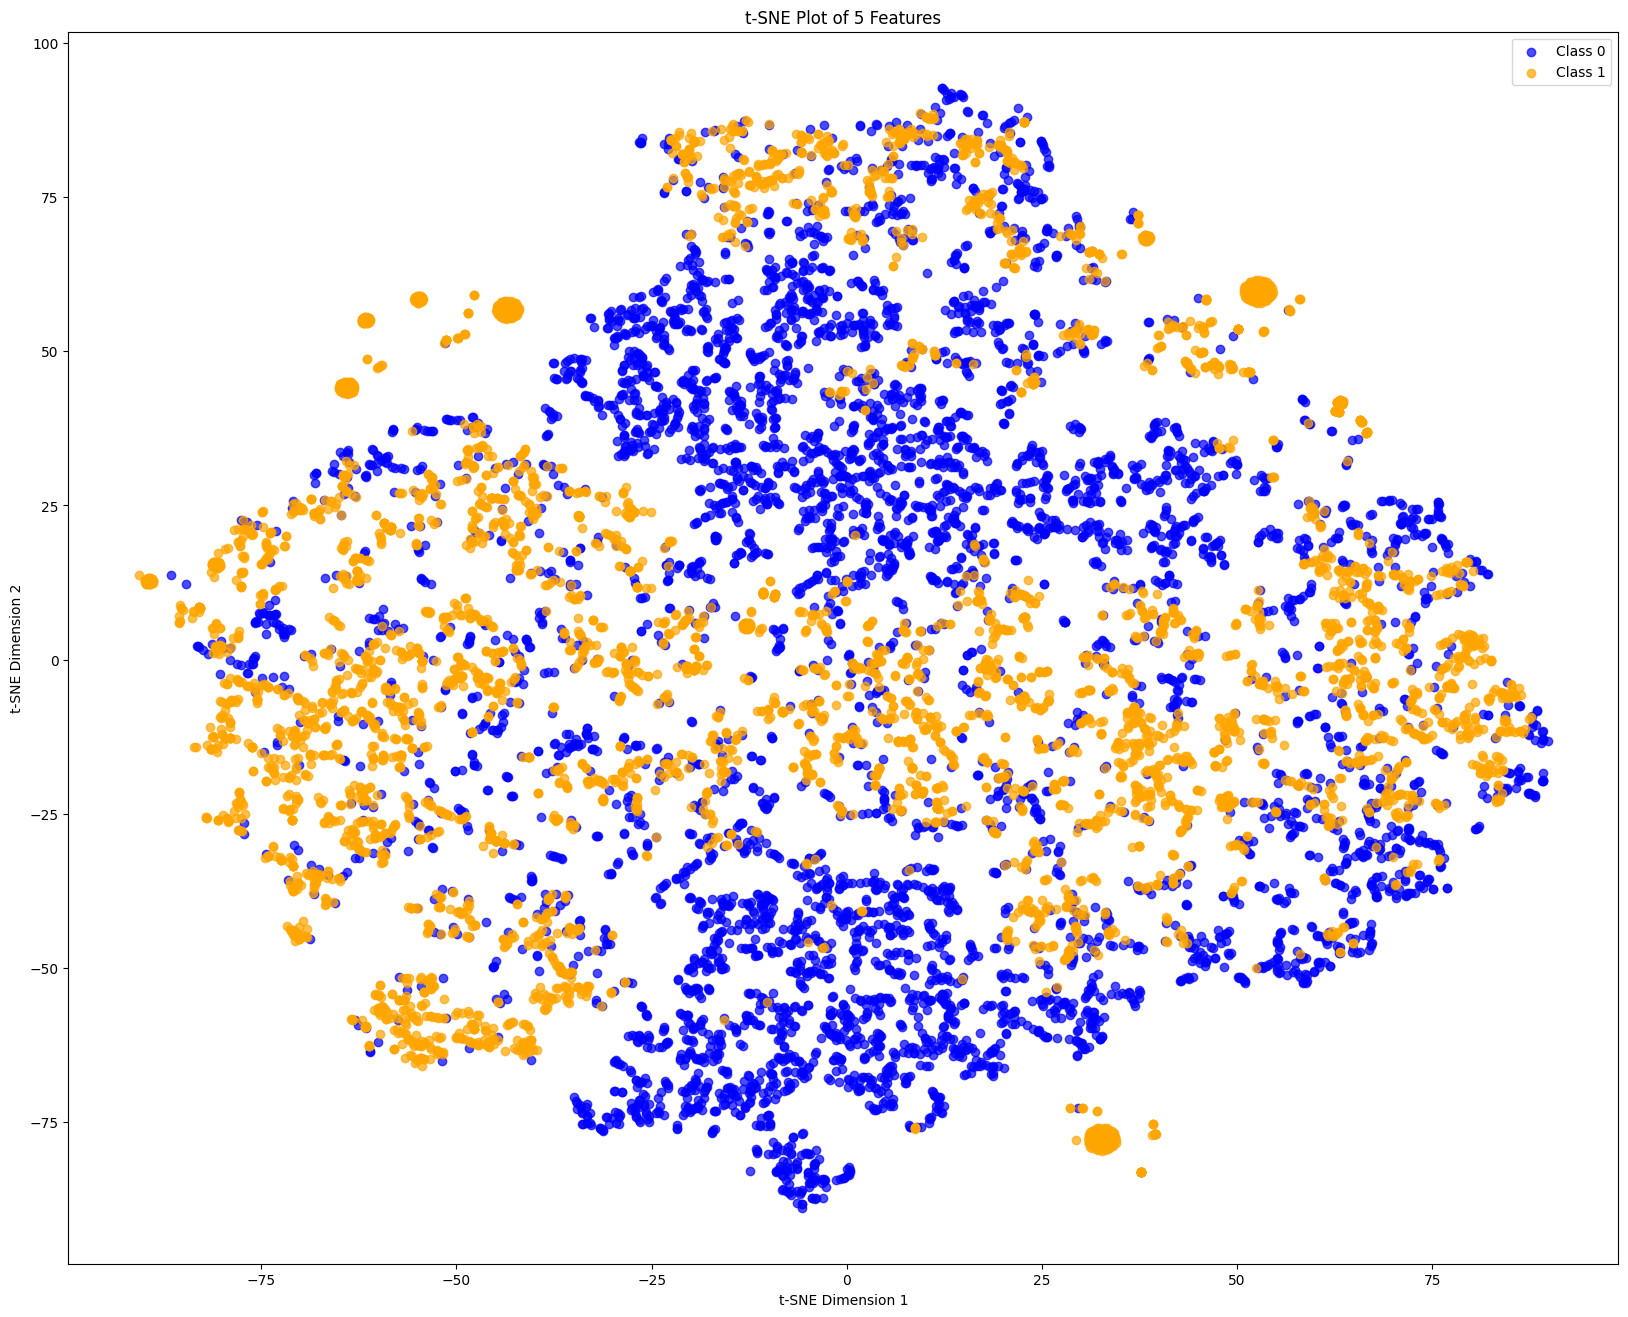

In [50]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your data is in the 'data' DataFrame and class labels are in 'final_df' column 'actual result'
features = ["Temperature (K)", "Specific Humidity", "Wind Speed (m/s)", "Soil Moisture (m^3/m^3)", "NDVI"]
data = final_df[features]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_data)

# Assuming 'final_df' has a column named 'actual result' containing class labels 0 and 1
class_labels = final_df['Actual result']

plt.figure(figsize=(20, 16))

# Plot points for class 0 (blue)
plt.scatter(tsne_result[class_labels == 0, 0], tsne_result[class_labels == 0, 1], c='blue', label='Class 0', alpha=0.7)

# Plot points for class 1 (orange)
plt.scatter(tsne_result[class_labels == 1, 0], tsne_result[class_labels == 1, 1], c='orange', label='Class 1', alpha=0.7)

plt.title("t-SNE Plot of 5 Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [51]:
neural_final.head()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,result
0,12.200594,39.669636,292.245433,0.008768,0.000000,0.070302,-0.192378,0
1,3.010317,35.345863,283.521876,0.002749,2.448574,0.212111,1.000000,0
2,10.506389,44.063056,283.711060,0.004320,8.428660,0.082414,0.034318,1
3,9.491111,41.903889,300.290283,0.003891,6.736856,0.057227,0.473233,1
4,18.394802,37.461335,290.105706,0.007225,0.901256,0.146384,0.356778,0


In [52]:
features_to_use2 = [
    'Temperature (K)', 'Specific Humidity', 'Wind Speed (m/s)', 'NDVI']
X_neural = neural_final[features_to_use2]
y_neural = neural_final['result']

X_scaled_neural = scaler.fit_transform(X_neural)

y_pred_neural= mlp_clf.predict(X_scaled_neural)
test_accuracy3 = accuracy_score(y_neural, y_pred_neural)
test_accuracy3


0.922158888493053

In [53]:
neural_final['Predicted Result'] = y_pred_neural
neural_final.rename(columns={"result": "Actual result"}, inplace=True)

In [54]:
neural_final.head()

,Latitude (degrees),Longitude (degrees),Temperature (K),Specific Humidity,Wind Speed (m/s),Soil Moisture (m^3/m^3),NDVI,Actual result,Predicted Result
0,12.200594,39.669636,292.245433,0.008768,0.000000,0.070302,-0.192378,0,0
1,3.010317,35.345863,283.521876,0.002749,2.448574,0.212111,1.000000,0,0
2,10.506389,44.063056,283.711060,0.004320,8.428660,0.082414,0.034318,1,1
3,9.491111,41.903889,300.290283,0.003891,6.736856,0.057227,0.473233,1,1
4,18.394802,37.461335,290.105706,0.007225,0.901256,0.146384,0.356778,0,0


In [55]:
predicted_result_neural = neural_final['Predicted Result']
predicted_result_final = final_df['Predicted Result']

different_indices = predicted_result_neural != predicted_result_final

different_rows = neural_final[different_indices]

print("Rows with different 'Predicted Result' values:")
different_rows.shape


Rows with different 'Predicted Result' values:


(326, 9)

In [56]:
neural_final.to_csv('output_neural.csv', index=False)